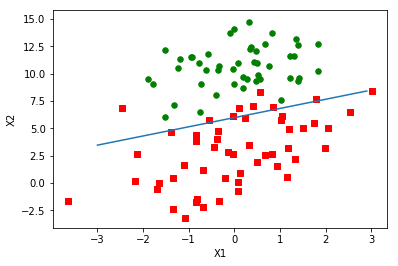

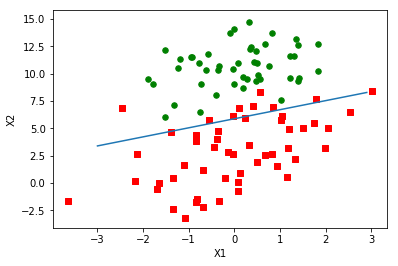

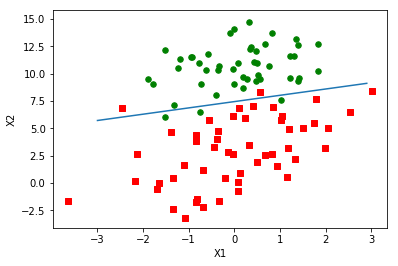

In [5]:
from numpy import *
import random
import matplotlib.pyplot as plt
#加在数据集
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        #为了便于截距b的计算，在数据集首尾加了一项1.0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#梯度上升
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001#移动步长，学习率
    maxCircles = 150#迭代次数
    weights = ones((n,1))
    for k in range(maxCircles):
        h = sigmoid(dataMatrix*weights)
        #该处推导见博文
        error = labelMat-h
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

#随机梯度上升基本函数
def stoGradAscent0(dataMatrix,classLabels, numIter=150):
    m,n = shape(dataMatrix)
    alpha = 0.001
    weights = ones(n)
    for _ in range(numIter):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha*error*dataMatrix[i]
    return weights

#随机梯度上升改进函数
#共3处改进：多轮随机梯度下降，每次更新权重是在随机选取的样本电上，步长alpha随着训练的进行逐渐减小（开始时较大）。（即自适应学习率）
def stoGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        for i in range(m):
            alpha = 4/(1.0+i+j) + 0.01
            #随机选取计算梯度使用的样本点
            randIndex = random.randint(0,m-1)
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha*error*dataMatrix[randIndex]
    return weights

#可视化分类效果：画出决策边界
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

#测试不同优化算法所得到的分类器分类效果
dataArr, labelMat = loadDataSet()
weights0 = gradAscent(dataArr, labelMat)
plotBestFit(weights0.getA())
weights1 = stoGradAscent0(array(dataArr), labelMat)
plotBestFit(weights1)
weights2 = stoGradAscent1(array(dataArr), labelMat)
plotBestFit(weights2)
            

In [8]:
#预测病马的死亡率
#分类
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stoGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

multiTest()

d:\programdata\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.268657
the error rate of this test is: 0.567164
the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.388060
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
the error rate of this test is: 0.253731
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.334328
